<a href="https://colab.research.google.com/github/malur1703/The-Sparks-Foundation-Tasks/blob/main/TSF_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#To Explore the Decision tree Algorithm
For the given 'iris' dataset, create the decision tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier,it will be able to predict the right class accordingly.

In [1]:
##Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
dt = pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:

print(dt)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [5]:

## Import Dataset
def importdata():
    iris = datasets.load_iris()
    dt = pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
    dt.reset_index(inplace=True)
    ##Printing the dataset shape
    print("Datset Length",len(dt))
    print("Dataset shape",dt.shape)
    print("Dataset:",dt.head())
    return dt

In [6]:
##function to split the dataset
def splitdataset(dt):
    x=dt.values[:,1:4]
    y=dt.values[:,0]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    return x,y,x_train,x_test,y_train,y_test

In [7]:

##function to perform training with giniIndex
def train_using_gini(x_train,x_test,y_train):
    #creating the classifier object
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    #performing training
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [8]:
##Function to perform training with entropy
def train_using_entropy(x_train,x_test,y_train):
    ##decision tree with entropy
    clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
    
    ##performing training
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [9]:
##function to make predictions
def prediction(x_test,clf_object):
    ##Prediction on test with giniindex
    y_pred=clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [10]:

##Function to calculate accuracy
def cal_accuracy(y_test,y_pred):
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred)*100)
    print("Report:",classification_report(y_test,y_pred))

In [11]:
##Driver code
def main():
    #Building phase
    data=importdata()
    x,y,x_train,x_test,y_train,y_test=splitdataset(data)
    clf_gini=train_using_gini(x_train,x_test,y_train)
    clf_entropy=train_using_entropy(x_train,x_test,y_train)
    #operational phase
    print('\n')
    print("Results using Gini Index:")
    
    
    #Prediction using gini
    y_pred_gini=prediction(x_test,clf_gini)
    cal_accuracy(y_test,y_pred_gini)
    print('\n')
    print("Results using Entropy:")
    
    
    #Prediction using entropy
    y_pred_entropy=prediction(x_test,clf_entropy)
    cal_accuracy(y_test,y_pred_entropy)

#Calling main function
if __name__=="__main__":
    main();

Datset Length 150
Dataset shape (150, 5)
Dataset:    index  sepal length (cm)  ...  petal length (cm)  petal width (cm)
0      0                5.1  ...                1.4               0.2
1      0                4.9  ...                1.4               0.2
2      0                4.7  ...                1.3               0.2
3      0                4.6  ...                1.5               0.2
4      0                5.0  ...                1.4               0.2

[5 rows x 5 columns]


Results using Gini Index:
Predicted values:
[2. 0. 2. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]
Confusion Matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy: 95.55555555555556
Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        18

    accuracy   

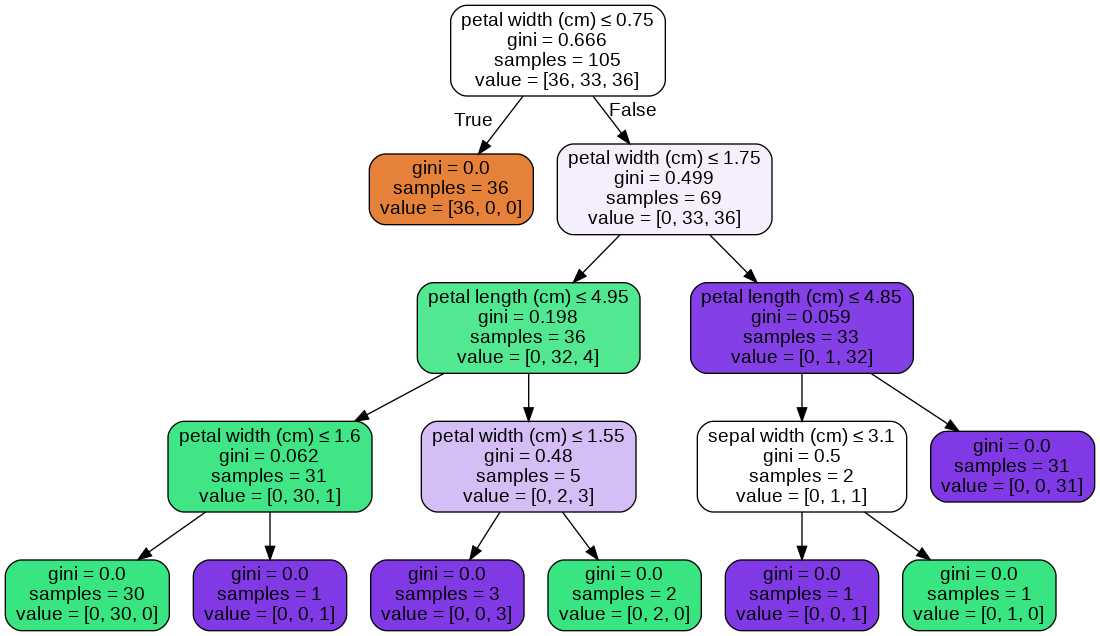

In [12]:
## Function to make tree
from io import StringIO ## for Python 3
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
y=iris.target
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x_train,x_test,y_train,y_test=train_test_split(dt,y,test_size=0.3,random_state=10)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())